<a href="https://colab.research.google.com/github/Swa-hub/Spam_Filtering/blob/main/Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [3]:
df1=pd.read_csv("/content/spam.csv",encoding='iso-8859-1')

df1.to_csv("/content/spam_utf8.csv", encoding='utf-8', index=False)

# Read the new UTF-8 encoded file
df1= pd.read_csv("/content/spam_utf8.csv")
print(df1.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
X=df1['v2']#all featues except target variable
X_arr=np.array(X)
corpus=X_arr
print(corpus)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']


In [5]:
y=df1['v1'] #target variable

vectorizer=CountVectorizer()
X_vec=vectorizer.fit_transform(corpus)  #matrix

print(vectorizer.get_feature_names_out())   #get list of unique words in vocabulary
print(X_vec.toarray())

le=LabelEncoder()
y=le.fit_transform(y)
print(le.classes_)

X_train,X_test,y_train,y_test=train_test_split(X_vec,y,test_size=0.2,random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['ham' 'spam']
Training set shape: (4457, 8672) (4457,)
Testing set shape: (1115, 8672) (1115,)


<ipython-input-6-7c77c484acef>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], c='pink', cmap='viridis', label='Ham')
<ipython-input-6-7c77c484acef>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], c='blue', cmap='viridis', label='Spam')


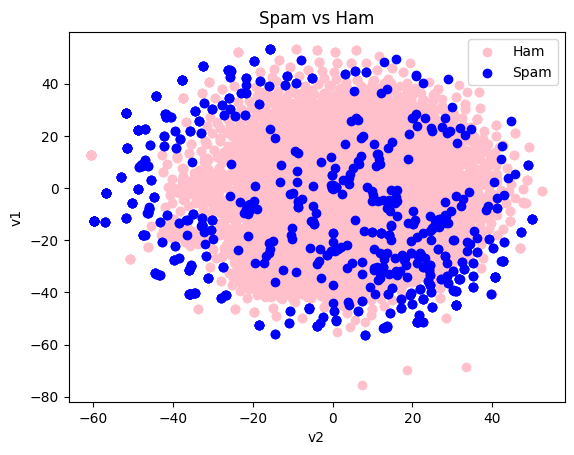

In [6]:
tsne=TSNE(n_components=2,random_state=42,init='random')
X_tsne=tsne.fit_transform(X_vec)


plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], c='pink', cmap='viridis', label='Ham')
plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], c='blue', cmap='viridis', label='Spam')
plt.title('Spam vs Ham')
plt.xlabel('v2')
plt.ylabel('v1')
plt.legend()
plt.show()

**Model-1**

In [7]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

y_pred=logistic_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred))

Accuracy: 0.97847533632287
Precision: 1.0
Recall: 0.84
F1 score: 0.9130434782608696


In [8]:
pred="HEYY BUDDY!!!Congracts YOU won a jackpot.Click the link below to collect ur money"
y_pred=logistic_model.predict(vectorizer.transform([pred]))
print(y_pred)

[0]


**Model-2**

In [9]:
nb_classifier=MultinomialNB()

nb_classifier.fit(X_train,y_train)
nb_y_pred=nb_classifier.predict(X_test)

In [10]:
accuracy=accuracy_score(y_test,nb_y_pred)
print("Accuracy: ",accuracy)
print("Precision:",precision_score(y_test,nb_y_pred))
print("Recall:",recall_score(y_test,nb_y_pred))
print("F1 score:",f1_score(y_test,nb_y_pred))
# Classification Report (precision, recall, F1-score)
print(classification_report(y_test,nb_y_pred))

Accuracy:  0.97847533632287
Precision: 0.9144736842105263
Recall: 0.9266666666666666
F1 score: 0.9205298013245033
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [11]:
pred="HEYY BUDDY!!!Congracts YOU won a jackpot.Click the link below to collect ur money"
y_pred1=nb_classifier.predict(vectorizer.transform([pred]))
print(y_pred1)
predicted_label=le.inverse_transform(y_pred1)[0]
print(predicted_label)

[1]
spam


In [12]:
pred1="Important Meeting"
y_pred2=nb_classifier.predict(vectorizer.transform([pred1]))
print(y_pred2)
predicted_label=le.inverse_transform(y_pred2)[0]
print(predicted_label)

[0]
ham


**Model-3**

In [16]:
svm_classifier=SVC()
svm_classifier.fit(X_train,y_train)

svm_pred=svm_classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test,svm_pred))
print("Precision:",precision_score(y_test,svm_pred))
print("Recall:",recall_score(y_test,svm_pred))
print("F1 score:",f1_score(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

Accuracy: 0.97847533632287
Precision: 1.0
Recall: 0.84
F1 score: 0.9130434782608696
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [17]:
pred_v="HEYY BUDDY!!!Congracts YOU won a jackpot.Click the link below to collect ur money"
y_pred2=svm_classifier.predict(vectorizer.transform([pred_v]))
print(y_pred2)
predicted_label2=le.inverse_transform(y_pred2)[0]
print(predicted_label2)

[0]
ham


In [18]:
pred_s="Important Meeting"
y_pred3=svm_classifier.predict(vectorizer.transform([pred_s]))
print(y_pred3)
predicted_label3=le.inverse_transform(y_pred3)[0]
print(predicted_label3)

[0]
ham
